In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def f(x,y):
	return np.sin(x*x+y*y)

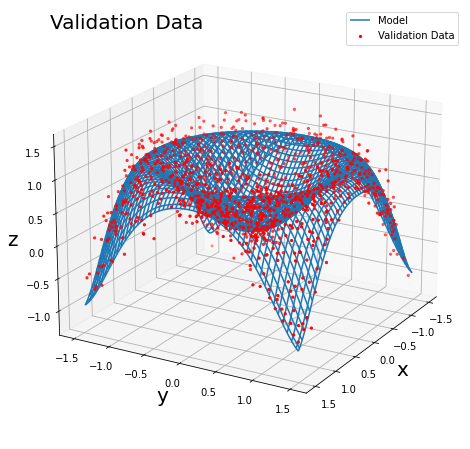

In [26]:
np.random.seed(0)
n_train = 12000
n_valid = 1200

x_train = np.zeros((n_train, 2))
x_valid = np.zeros((n_valid, 2))
y_train = np.zeros(n_train)
y_valid = np.zeros(n_valid)

sigma = 0.2

for i in range(n_train):
    x_train[i,0] = np.random.uniform(-1.5,1.5)
    x_train[i,1] = np.random.uniform(-1.5,1.5)
    y_train[i] = np.random.normal(f(x_train[i,0],x_train[i,1]),sigma)

for i in range(n_valid):
    x_valid[i,0] = np.random.uniform(-1.5,1.5)
    x_valid[i,1] = np.random.uniform(-1.5,1.5)
    y_valid[i] = np.random.normal(f(x_valid[i,0],x_valid[i,1]),sigma)


x_plot = np.arange(-1.5,1.5, 0.03)
y_plot = np.arange(-1.5,1.5, 0.03)
X_plot, Y_plot = np.meshgrid(x_plot,y_plot)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X_plot, Y_plot, f(X_plot,Y_plot), rstride=2, cstride=2, label='Model')
ax.scatter(np.transpose(x_valid)[0], np.transpose(x_valid)[1], y_valid, color='red', marker='.', label='Validation Data')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
ax.text2D(0.05, 0.95, "Validation Data", transform=ax.transAxes, fontsize=20)
ax.view_init(20, 30)
ax.legend()
plt.show()


In [16]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
# model.add(Dense(1, input_shape=(2,)))

model.add(Dense(20, input_shape=(2,), activation='relu'))
# Adds another layer with 18 units, each connected to 27 outputs of previous layer
model.add(Dense(20, activation='relu'))

# Last layer with 9 units, each connected to 18 outputs of previous layer
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

##model.compile(optimizer=optimizers.SGD(lr=0.01, decay=1.e-6, momentum=0.5), loss='mse', metrics=['mse'])

In [27]:
# get a summary of our composed model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_7 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [19]:
##history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=80, validation_data=(x_valid,y_valid))

history = model.fit(x=x_train, y=y_train, 
          batch_size=100, epochs=60,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/60
120/120 [==============================] - 1s 4ms/step - loss: 0.0986 - mse: 0.0986 - val_loss: 0.0879 - val_mse: 0.0879
Epoch 2/60
120/120 [==============================] - 0s 4ms/step - loss: 0.0962 - mse: 0.0962 - val_loss: 0.0855 - val_mse: 0.0855
Epoch 3/60
120/120 [==============================] - 1s 4ms/step - loss: 0.0940 - mse: 0.0940 - val_loss: 0.0835 - val_mse: 0.0835
Epoch 4/60
120/120 [==============================] - 0s 4ms/step - loss: 0.0918 - mse: 0.0918 - val_loss: 0.0812 - val_mse: 0.0812
Epoch 5/60
120/120 [==============================] - 0s 4ms/step - loss: 0.0898 - mse: 0.0898 - val_loss: 0.0793 - val_mse: 0.0793
Epoch 6/60
120/120 [==============================] - 0s 4ms/step - loss: 0.0877 - mse: 0.0877 - val_loss: 0.0776 - val_mse: 0.0776
Epoch 7/60
120/120 [==============================] - 1s 4ms/step - loss: 0.0858 - mse: 0.0858 - val_loss: 0.0752 - val_mse: 0.0752
Epoch 8/60
120/120 [==============================] - 1s 4ms/step - loss: 0.

In [28]:
# return weights and biases
model.get_weights()

[array([[-0.4565448 ,  0.06470349, -0.6368302 , -0.5579182 ,  0.2006079 ,
         -0.580196  ,  0.24148446, -0.17581879, -0.05355589,  0.6185188 ,
          0.01686014, -0.53057873,  0.3085998 ,  0.46625105, -0.5032972 ,
          0.28131473,  0.5198903 , -0.4569267 ,  0.47566712,  0.1493308 ],
        [-0.52888507,  0.52562934,  0.4440211 , -0.14196451,  0.38895318,
         -0.45771822,  0.751429  ,  0.27902952,  0.3551222 ,  0.41148356,
          0.5045051 , -0.47371486,  0.17726618, -0.48705137,  0.47532374,
          0.25469378, -0.6086056 ,  0.39691225,  0.03296731,  0.47247806]],
       dtype=float32),
 array([-0.30442533, -0.07472055, -0.2762946 , -0.19028965,  0.39174223,
        -0.30366242, -0.3743485 ,  0.5568233 , -0.16820149, -0.24468945,
         0.04270633, -0.08189511, -0.31603044, -0.25955418, -0.06964459,
         0.1747246 , -0.1931884 , -0.19161695, -0.03445886, -0.12021232],
       dtype=float32),
 array([[-2.38052621e-01,  5.06925657e-02, -3.22926193e-01,
      

In [29]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

38/38 [==============================] - 0s 3ms/step - loss: 0.0420 - mse: 0.0420

Test loss: 0.04199998080730438
Test accuracy: 0.04199998080730438


In [30]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

38/38 [==============================] - 0s 2ms/step - loss: 0.0420 - mse: 0.0420

Test loss: 0.04199998080730438
Test accuracy: 0.04199998080730438


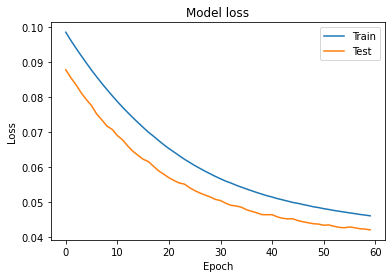

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

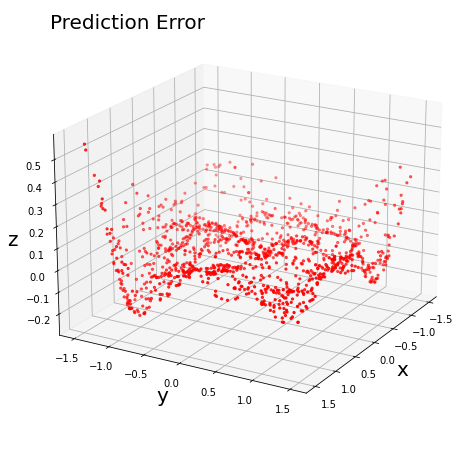

In [32]:
x_predicted = np.zeros((n_valid,2))
y_target = np.zeros(n_valid)

for i in range(n_valid):
    x_predicted[i,0] = np.random.uniform(-1.5,1.5)
    x_predicted[i,1] = np.random.uniform(-1.5,1.5)
    y_target[i] = f(x_predicted[i,0],x_predicted[i,1])

y_predicted = np.transpose(model.predict(x_predicted))
y_predicted -= y_target

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(np.transpose(x_predicted)[0], np.transpose(x_predicted)[1], y_predicted, color='red', marker='.', label='Validation Data')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
ax.text2D(0.05, 0.95, "Prediction Error", transform=ax.transAxes, fontsize=20)
ax.view_init(20, 30)
plt.show()

In [ ]:
# generate training inputs
#n_train = 12000
#n_valid = 1200

#np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, n_train)
x_valid = np.random.uniform(-1.5, 1.5, n_valid)
x_valid.sort()
y_train = np.random.uniform(-1.5, 1.5, n_train)
y_valid = np.random.uniform(-1.5, 1.5, n_valid)
y_valid.sort()

X = x_valid
Y = y_valid
Z = f(X,Y)

fig = plt.figure(figsize=(10, 7))
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
#ax.set_zlabel('z', fontsize=18)
#ax.view_init(10, 30)